<a href="https://colab.research.google.com/github/sradhasr/UNIVARIATE_LINEAR_REGRESSION/blob/master/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.IMPORT LIBRARIES**

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']=(12,8)

**2.LOAD THE DATA**

In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/dataset/population,profit.txt")
data_df.shape

(97, 2)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   popuation  97 non-null     float64
 1   profit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


**3.visualization of data**

Text(0.5, 1.0, 'population versus profit ')

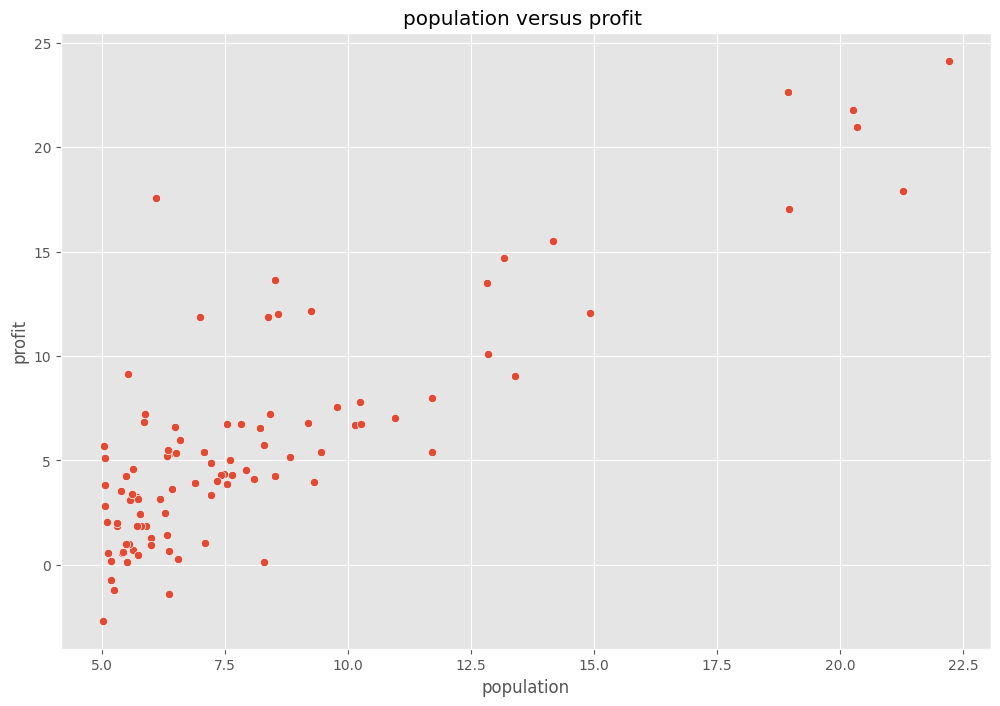

In [ ]:
ax=sns.scatterplot(x='population',y='profit',data=data_df)
ax.set_title("population versus profit ")


**4.COMPUTE THE COST J(theta)**


In [ ]:
def cost_function(x,y,theta):
  m=len(y)
  y_pred=x.dot(theta)
  error=(y_pred-y)**2
  return np.sum(error)/(2*m)

In [ ]:
m= data_df.population.values.size
x=np.append(np.ones((m,1)),data_df.population.values.reshape(m,1),axis=1)
y=data_df.profit.values.reshape(m,1)
theta=np.zeros((2,1))

cost_function(x,y,theta)

32.072733877455676

**5.gradient Descent**


In [ ]:
def gradient_descent(x,y,theta,alpha,iterations):
    """
    alpha: learning rate
    """
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred =x.dot(theta)
        error =np.dot(x.transpose(),(y_pred-y))
        theta=theta-alpha*(1/m)*error

        costs.append(cost_function(x,y,theta))
    return theta,costs

In [ ]:
theta,costs=gradient_descent(x,y,theta,0.01,2000)
print(f"h(x)= { theta[0][0]} + {theta[1][0]} x1")

h(x)= -3.7880685727231094 + 1.1822127747573767 x1


**6.visualising the cost functio j(theta)**


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 =np.linspace(-10,10,100)
theta_1 =np.linspace(-1,4,100)
cost_values=np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range (len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]=cost_function(x,y,t)

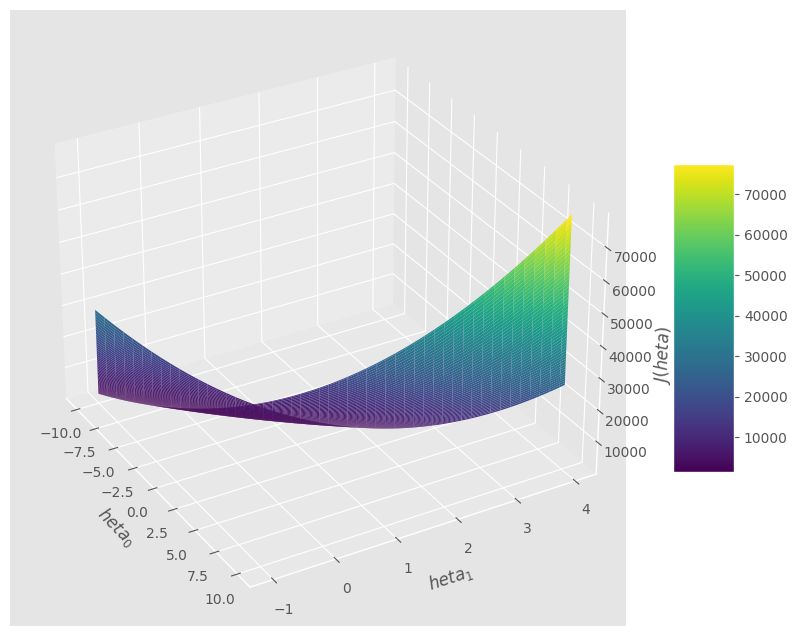

In [ ]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection= '3d')
surf=ax.plot_surface(theta_0,theta_1,cost_values,cmap=('viridis'))
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.xlabel("$\theta_0$")
plt.ylabel("$\theta_1$")
ax.set_zlabel("$J(\theta)$")
ax.view_init(30,330)
plt.show()



**7.plotting the convergence**

Text(0.5, 1.0, 'values of cost function over iteration in gradient descent')

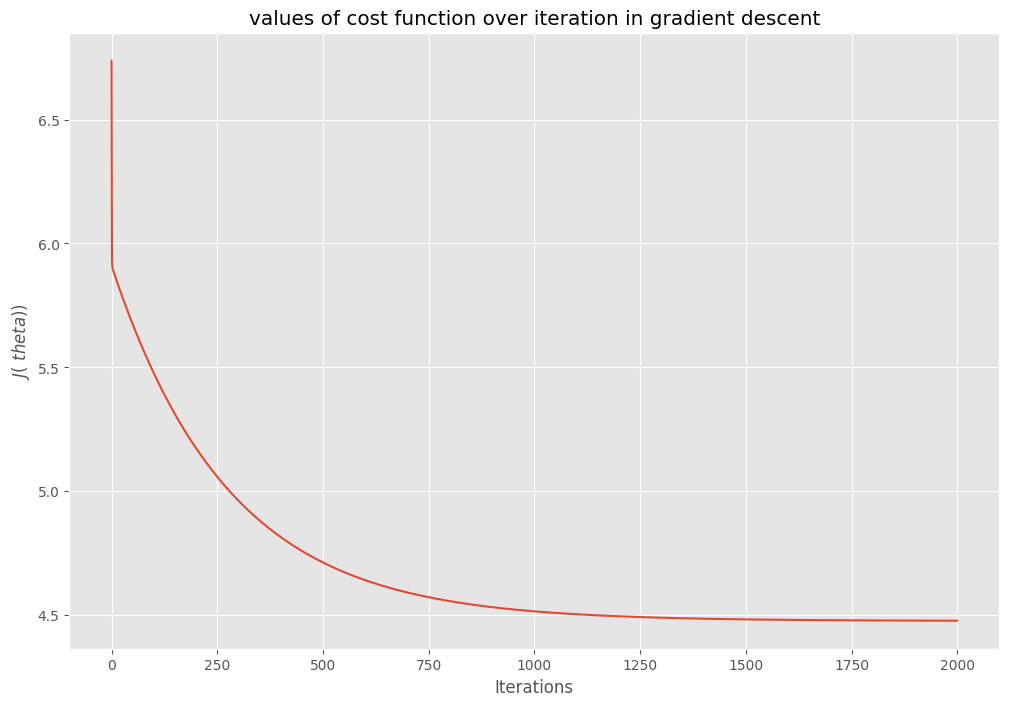

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\ theta)$)")
plt.title("values of cost function over iteration in gradient descent")

**8.Traing data with linear regression Fit**

In [ ]:
theta.shape
theta

array([[-3.78806857],
       [ 1.18221277]])

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[2.122995301063774, 3.305208075821151, 4.487420850578529, 5.669633625335905, 6.851846400093281, 8.034059174850658, 9.216271949608036, 10.398484724365412, 11.580697499122788, 12.762910273880166, 13.94512304863754, 15.127335823394919, 16.309548598152297, 17.49176137290967, 18.67397414766705, 19.856186922424424, 21.038399697181802, 22.22061247193918, 23.402825246696555, 24.585038021453933]


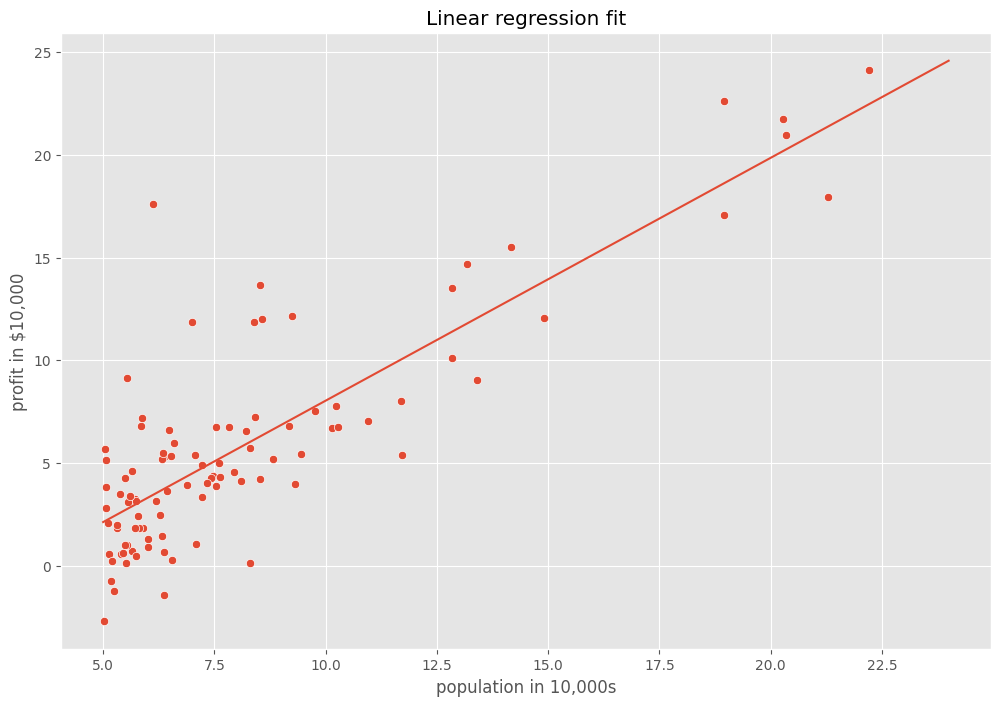

In [ ]:
theta=np.squeeze(theta)
sns.scatterplot(x="population",y='profit',data=data_df)
x_value=[x for x in range(5,25)]
y_value=[(x*theta[1]+theta[0]) for x in x_value]
print(x_value)
print(y_value)
plt.plot(x_value,y_value)
plt.xlabel("population in 10,000s")
plt.ylabel("profit in $10,000")
plt.title("Linear regression fit")
plt.show()

**9.interface using optimised theta values**

In [ ]:
def predict(x,theta):
    y_pred=np.dot(theta.T,x)
    return y_pred
   

In [ ]:
y_pred_1=predict(np.array([1,4]),theta)*10000
print("For a population of 40000 people,the model predicts a profit of "+str(round(y_pred_1)))

For a population of 40000 people,the model predicts a profit of 9408


In [ ]:
y_pred_2=predict(np.array([1,8.3]),theta)*10000
print("For a population of 40000 people,the model predicts a profit of "+str(round(y_pred_2)))

For a population of 40000 people,the model predicts a profit of 60243
